# **Coursera Courses Analysis**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Basic Information**

### Reading data

In [40]:
df = pd.read_csv('CourseraDataset-Clean.csv')
df.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


### Finding shape of dataset

In [41]:
df.shape

(8370, 13)

### The distribution of null values

In [42]:
df.isnull().sum()

Course Title                       0
Rating                             0
Level                              0
Schedule                           0
What you will learn                0
Skill gain                         0
Modules                           33
Instructor                        88
Offered By                         0
Keyword                            0
Course Url                         0
Duration to complete (Approx.)     0
Number of Review                   0
dtype: int64

## **2. Course Rating Analysis:**

### The distribution of ratings for the courses

In [43]:
pd.DataFrame(df.groupby('Course Title')['Rating'].mean())

,Rating
Course Title,
Assisting Public Sector Decision Makers With Policy Analysis,4.8
Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE,4.9
Build a social media presence for your business using Canva,4.7
Build social awareness content for Twitter with Canva,0.0
"Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado",4.9
...,...
"현대 로봇공학, 강좌 2: 로봇 기구학",0.0
"현대 로봇공학, 강좌 3: 로봇 동역학",0.0
"현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어",0.0


### Which courses have the highest and lowest ratings?

#### Highest

In [44]:
h_rating = pd.DataFrame(df.groupby('Course Title')['Rating'].mean().sort_values(ascending=False))
h_rating[h_rating['Rating'] == 5]

,Rating
Course Title,
Manajemen Proyek Google Professional Certificate,5.0
La salud vegetal. Plagas y enfermedades en plantas,5.0
Secure Coding in Laravel Specialization,5.0
Rapid Prototyping and Tooling Specialization,5.0
生物学概念与途径,5.0
...,...
Keamanan IT: Pertahanan terhadap Kejahatan Digital,5.0
Recuperación Optimizada en Cirugía Colorrectal,5.0
Activity Design with PhET Simulations for STEM Education,5.0


#### Lowest

In [45]:
l_rating = pd.DataFrame(df.groupby('Course Title')['Rating'].mean().sort_values(ascending=False))
l_rating[l_rating['Rating'] == 0]

,Rating
Course Title,
البحث عن عمل في العصر الرقمي | Job Search in the Digital Age,0.0
AWS: Networking,0.0
AWS: Data Management and Backups,0.0
Abordaje del riesgo suicida en adolescentes y jóvenes,0.0
استخدام الوسائط الرقمية لتعزيز النتائج الصحية,0.0
...,...
Create Swag Bag Inserts to Market your Business using Canva,0.0
Powering the Drive: Unveiling EV Electronics,0.0
Create a Business Model Canvas in Miro,0.0


## **3. Level Distribution:**

### How are the courses distributed based on difficulty level?

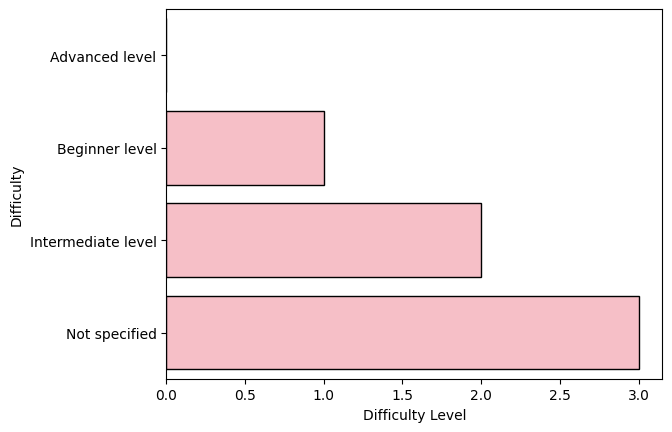

In [77]:
sns.barplot(pd.DataFrame(df.groupby('Level'))[0], color='lightpink', edgecolor = 'black')
plt.xlabel('Difficulty Level')
plt.ylabel('Difficulty')
plt.show()

### Is there a correlation between the level of difficulty and the number of reviews or ratings?

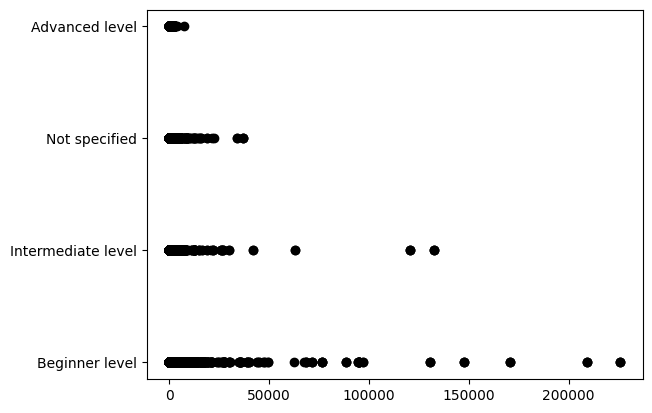

In [81]:
plt.scatter(df['Number of Review'],df['Level'], color ='black')
plt.show()

## **4. Schedule Flexibility Analysis:**

### What percentage of courses offer flexible schedules?

In [70]:
sch = df[df['Schedule'] == 'Flexible schedule']
round((len(sch['Course Title']) / len(df['Course Title'])) * 100, 2)

96.15

### Is there any relationship between the schedule flexibility and the level of the course or the duration to complete it?

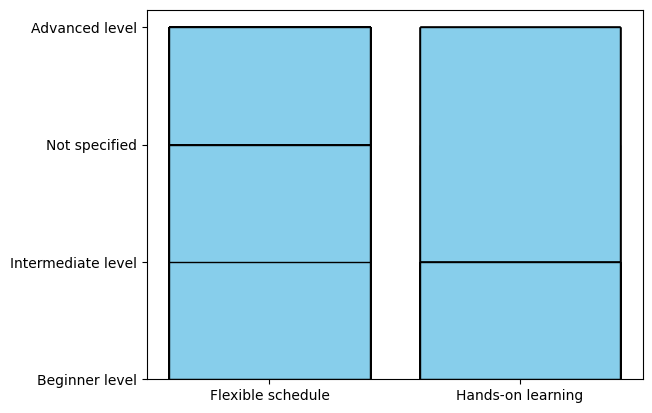

In [82]:
plt.bar(df['Schedule'],df['Level'], color='skyblue', edgecolor='black')
plt.show()

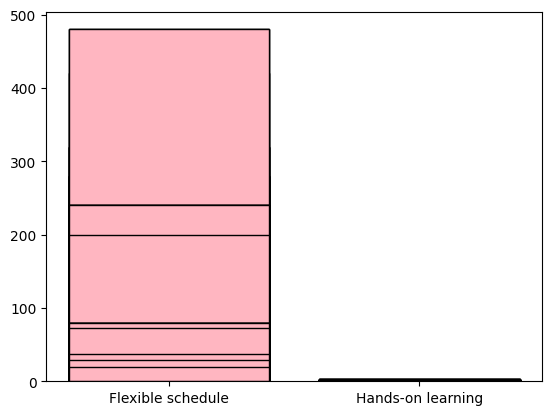

In [83]:
plt.bar(df['Schedule'], df['Duration to complete (Approx.)'], color='lightpink', edgecolor='black')
plt.show()

## **5. Learning Objectives Comparison:**

### What are the common learning objectives across different courses?

In [86]:
pd.DataFrame(df.groupby('Course Title')['Keyword'].count())

,Keyword
Course Title,
Assisting Public Sector Decision Makers With Policy Analysis,1
Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE,1
Build a social media presence for your business using Canva,2
Build social awareness content for Twitter with Canva,1
"Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado",1
...,...
"현대 로봇공학, 강좌 2: 로봇 기구학",1
"현대 로봇공학, 강좌 3: 로봇 동역학",1
"현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어",1
